In [1]:
import numpy 
from sklearn.neural_network import MLPRegressor 
from glob import glob
import pickle
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import os, os.path 
import pandas as pd

In [2]:
from glob import glob
import pickle
import numpy as np

ROOT_PATH = "./"

cities = ["austin", "miami", "pittsburgh", "dearborn", "washington-dc", "palo-alto"]
splits = ["train", "test"]

def get_city_trajectories(city="palo-alto", split="train", normalized=False):

    
    outputs = None
    
    if split=="train":
        f_in = ROOT_PATH + split + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)[:int(n)]
        
        f_out = ROOT_PATH + split + "/" + city + "_outputs"
        outputs = pickle.load(open(f_out, "rb"))
        outputs = np.asarray(outputs)[:int(n)]      
    
    else:
        f_in = ROOT_PATH + split + "/" + city + "_inputs"
        inputs = pickle.load(open(f_in, "rb"))
        n = len(inputs)
        inputs = np.asarray(inputs)

    return inputs, outputs

class ArgoverseDataset(Dataset):
    """Dataset class for Argoverse"""
    def __init__(self, city: str, split:str, transform=None):
        super(ArgoverseDataset, self).__init__()
        self.transform = transform

        self.inputs, self.outputs = get_city_trajectories(city=city, split=split, normalized=False)

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):

        data = (self.inputs[idx], self.outputs[idx])
            
        if self.transform:
            data = self.transform(data)

        return data

# intialize a dataset
city = 'palo-alto' 
split = 'train'
train_dataset  = ArgoverseDataset(city = city, split = split)

In [12]:
if torch.cuda.is_available():
    torch.device('cuda')
else:
    torch.device('cpu')

In [3]:
output = [d[1].flatten() for d in train_dataset]
in_put = [d[0].flatten() for d in train_dataset]
# in_put[0]


In [4]:
a = in_put[0]

In [5]:
x = [ a[i] for i in range(len(a)) if i %2 == 0 ]
y =  [ a[i] for i in range(len(a)) if i %1 == 0 ]

In [6]:
xv = np.array(x[1:])-np.array(x[0:-1])
# xv

In [57]:
def velocity(l):
    x = [ l[i] for i in range(len(l)) if i %2 == 0 ]
    y = [ l[i] for i in range(len(l)) if i %2 == 1 ]
    xv = (np.array(x[1:])-np.array(x[0:-1]))*10
    yv = (np.array(y[1:])-np.array(y[0:-1]))*10
    l = list(l) + list(xv)
    l = l + list(yv)
    return l



In [68]:
def acceleration(l):
    xv = [ l[i] for i in range(len(l)-98,len(l)) if i %2 == 0 ]
    yv = [ l[i] for i in range(len(l)-98,len(l)) if i %2 == 1 ]
    xa = (np.array(xv[1:])-np.array(xv[0:-1]))*10
    ya = (np.array(yv[1:])-np.array(yv[0:-1]))*10
    l = list(l) + list(xa)
    l = l + list(ya)
    return l

In [71]:
acceleration(velocity(a))

[-1303.7625276038482,
 1138.3124640329393,
 -1303.517424014201,
 1138.7170753230766,
 -1303.2120495180375,
 1139.2190470899345,
 -1302.8482390170827,
 1139.8161694970458,
 -1302.42992386309,
 1140.50078551374,
 -1301.9618837405392,
 1141.2626240901507,
 -1301.45587619796,
 1142.083145521028,
 -1300.9259305111646,
 1142.9409609801223,
 -1300.3828922115663,
 1143.8173383348644,
 -1299.8369398161258,
 1144.6934416179668,
 -1299.3030767365838,
 1145.5435762826125,
 -1298.7831406221476,
 1146.3669507715424,
 -1298.2631982820594,
 1147.188707593427,
 -1297.7430053453404,
 1148.0062384777023,
 -1297.2236032805479,
 1148.8143175907458,
 -1296.7057354134845,
 1149.6149134693353,
 -1296.1882591882677,
 1150.4121350330367,
 -1295.6709364702251,
 1151.204693255943,
 -1295.1528744635789,
 1151.99354667057,
 -1294.6350687100685,
 1152.7780661985892,
 -1294.119913240647,
 1153.556860502254,
 -1293.6080553801041,
 1154.3317613161955,
 -1293.0999461674526,
 1155.1015156803849,
 -1292.5938245417228,
 11

In [73]:
relation(a, 3)

[-1303.7625276038482,
 1138.3124640329393,
 -1303.517424014201,
 1138.7170753230766,
 -1303.2120495180375,
 1139.2190470899345,
 -1302.8482390170827,
 1139.8161694970458,
 -1302.42992386309,
 1140.50078551374,
 -1301.9618837405392,
 1141.2626240901507,
 -1301.45587619796,
 1142.083145521028,
 -1300.9259305111646,
 1142.9409609801223,
 -1300.3828922115663,
 1143.8173383348644,
 -1299.8369398161258,
 1144.6934416179668,
 -1299.3030767365838,
 1145.5435762826125,
 -1298.7831406221476,
 1146.3669507715424,
 -1298.2631982820594,
 1147.188707593427,
 -1297.7430053453404,
 1148.0062384777023,
 -1297.2236032805479,
 1148.8143175907458,
 -1296.7057354134845,
 1149.6149134693353,
 -1296.1882591882677,
 1150.4121350330367,
 -1295.6709364702251,
 1151.204693255943,
 -1295.1528744635789,
 1151.99354667057,
 -1294.6350687100685,
 1152.7780661985892,
 -1294.119913240647,
 1153.556860502254,
 -1293.6080553801041,
 1154.3317613161955,
 -1293.0999461674526,
 1155.1015156803849,
 -1292.5938245417228,
 11

In [28]:
def get_csv(city):
    
    #get data ready for this city
    train_dataset = ArgoverseDataset(city, split = "train")
    output = [d[1].flatten() for d in train_dataset]
    in_put = [d[0].flatten() for d in train_dataset]
    in_put_new = [velocity(l) for l in in_put]
 
    # standardize the train data 
    #x_scaler = preprocessing.StandardScaler().fit(in_put)
   # y_scaler = preprocessing.StandardScaler().fit(output)
   # X_scaled = x_scaler.transform(in_put)
    #y_scaled = y_scaler.transform(output)
    
    
    #train the model for this city
    model = MLPRegressor(activation="relu", solver="adam", early_stopping=True,validation_fraction = 0.3,
    learning_rate="adaptive", max_iter=500,alpha=0.0005,hidden_layer_sizes = (32,64,64,128), device=torch.device('cuda'))
    model.fit(in_put_new,output)
    #print(model.loss_)
    #get the predictoin 
    test_input,y = get_city_trajectories(city, "test", normalized=False)
    x_test = [ d.flatten().to(device) for d in test_input]
    in_put_newtest = [ velocity(l).to(device) for l in x_test]
    # xtest_scaler = preprocessing.StandardScaler().fit(x_test)
    # xtest_scaled = xtest_scaler.transform(x_test)
    
    y= model.predict(in_put_newtest).to(device)
    #real_y =y_scaler.inverse_transform(y)
    return y

In [30]:
a

array([-1303.7625276 ,  1138.31246403, -1303.51742401,  1138.71707532,
       -1303.21204952,  1139.21904709, -1302.84823902,  1139.8161695 ,
       -1302.42992386,  1140.50078551, -1301.96188374,  1141.26262409,
       -1301.4558762 ,  1142.08314552, -1300.92593051,  1142.94096098,
       -1300.38289221,  1143.81733833, -1299.83693982,  1144.69344162,
       -1299.30307674,  1145.54357628, -1298.78314062,  1146.36695077,
       -1298.26319828,  1147.18870759, -1297.74300535,  1148.00623848,
       -1297.22360328,  1148.81431759, -1296.70573541,  1149.61491347,
       -1296.18825919,  1150.41213503, -1295.67093647,  1151.20469326,
       -1295.15287446,  1151.99354667, -1294.63506871,  1152.7780662 ,
       -1294.11991324,  1153.5568605 , -1293.60805538,  1154.33176132,
       -1293.09994617,  1155.10151568, -1292.59382454,  1155.86684617,
       -1292.09151143,  1156.62596014, -1291.5911971 ,  1157.3821201 ,
       -1291.08718506,  1158.14207537, -1290.57690412,  1158.90776374,
      

In [66]:
# num_iteration determines how deep the relationship we are calculating
# ex: num_iteration = 1, we add speed
# ex: num_iteration = 2, we add speed + acceleration
# ex: num_iteration = 3, we add speed + acceleration + accel-acceleration
def relation(l, num_iteration):
    length = len(l)
    # each loop adds one set of further relationship data
    for loop in range(num_iteration):
        xv = [ l[i] for i in range(len(l) - (length - 2*(loop)), len(l)) if i % 2 == 0 ]
        yv = [ l[i] for i in range(len(l) - (length - 2*(loop)), len(l)) if i % 2 == 1 ]
        xa = (np.array(xv[1:]) - np.array(xv[0:-1]))*10
        ya = (np.array(yv[1:]) - np.array(yv[0:-1]))*10
        l = list(l) + list(xa)
        l = list(l) + list(ya)
    return l

In [79]:
def get_csv(city):
    
    #get data ready for this city
    train_dataset = ArgoverseDataset(city, split = "train")
    output = [d[1].flatten() for d in train_dataset]
    in_put = [d[0].flatten() for d in train_dataset]
    in_put_new = [relation(l,5) for l in in_put]
    #in_put_new_v3 = in_put_new_v2.append(city_onehot(city))
 
    # standardize the train data 
    #x_scaler = preprocessing.StandardScaler().fit(in_put)
   # y_scaler = preprocessing.StandardScaler().fit(output)
   # X_scaled = x_scaler.transform(in_put)
    #y_scaled = y_scaler.transform(output)
    
    
    #train the model for this city
    model = MLPRegressor(activation="relu", solver="adam", early_stopping=True,validation_fraction = 0.3,
    learning_rate="adaptive", max_iter=1,alpha=0.0005,hidden_layer_sizes = (32,64,128,256))
    
    model.fit(in_put_new,output)
    print(model.loss_)
    #get the predictoin 
    test_input,y =get_city_trajectories(city, "test", normalized=False)
    x_test = [ d.flatten() for d in test_input]

In [80]:
austin = get_csv("austin")

/opt/conda/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


369347.01344393723


In [67]:
relation(a,5)

[-1303.7625276038482,
 1138.3124640329393,
 -1303.517424014201,
 1138.7170753230766,
 -1303.2120495180375,
 1139.2190470899345,
 -1302.8482390170827,
 1139.8161694970458,
 -1302.42992386309,
 1140.50078551374,
 -1301.9618837405392,
 1141.2626240901507,
 -1301.45587619796,
 1142.083145521028,
 -1300.9259305111646,
 1142.9409609801223,
 -1300.3828922115663,
 1143.8173383348644,
 -1299.8369398161258,
 1144.6934416179668,
 -1299.3030767365838,
 1145.5435762826125,
 -1298.7831406221476,
 1146.3669507715424,
 -1298.2631982820594,
 1147.188707593427,
 -1297.7430053453404,
 1148.0062384777023,
 -1297.2236032805479,
 1148.8143175907458,
 -1296.7057354134845,
 1149.6149134693353,
 -1296.1882591882677,
 1150.4121350330367,
 -1295.6709364702251,
 1151.204693255943,
 -1295.1528744635789,
 1151.99354667057,
 -1294.6350687100685,
 1152.7780661985892,
 -1294.119913240647,
 1153.556860502254,
 -1293.6080553801041,
 1154.3317613161955,
 -1293.0999461674526,
 1155.1015156803849,
 -1292.5938245417228,
 11

In [ ]:
length = len(l)
xv = [ l[i] for i in range(len(l) - (length - 2*(loop+1)), len(l)) if i % 2 == 0 ]

In [27]:
get_csv("miami")

TypeError: __init__() got an unexpected keyword argument 'device'

In [191]:
# get all the prediction 
final =[]
for city in cities:
    x = get_csv(city)
    for ele in x:
        final.append(ele)


97.868811579875
157.80708751499174
95.72639854338782
792.0624724539435
163.63807359223014
249.7933487569418


In [192]:
len(final)

29843

In [194]:
np.savetxt("prediction.csv", 
           final,
           delimiter =", ",
           fmt ='% s')

In [234]:
df = pd.read_csv('C:/Users/ly264/Desktop/CSE151b_final_project/sample_submission.csv')

In [244]:
final

,v0,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29841,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

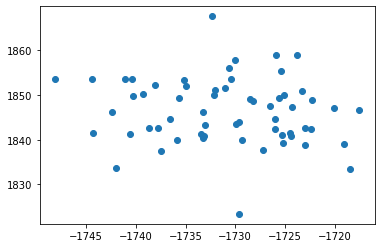

In [176]:
import matplotlib.pyplot as plt
y_show = y[677]
x_res = []
y_res = []
for i in range(0,120,2):
    x_res.append(y_show[i])
    y_res.append(y_show[i+1])
plt.scatter(x_res, y_res)
plt.show


In [249]:
    #get data ready for this city
    train_dataset = ArgoverseDataset("austin", split = "train")
    output = [d[1].flatten() for d in train_dataset]
    in_put = [d[0].flatten() for d in train_dataset]
    
    #train the model for this city
    model = MLPRegressor(activation="relu", solver="adam", early_stopping=False,
    learning_rate="adaptive", max_iter=400,alpha=0.001,hidden_layer_sizes = (32,64,64,128))
    
    model.fit(in_put,output)
    

    

MLPRegressor(alpha=0.001, hidden_layer_sizes=(32, 64, 64, 128),
             learning_rate='adaptive', max_iter=400)

In [33]:
import matplotlib.pyplot as plt

In [36]:
li = np.log((model.loss_curve_))

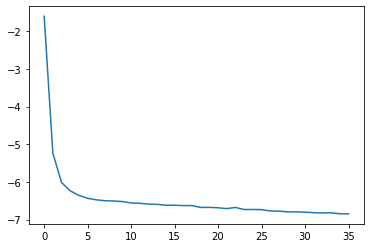

In [37]:
plt.plot(li)